In [11]:
#!/usr/bin/python
import struct
import numpy as np
import netCDF4 as nc

In [12]:
#pwd
import xarray
filename = 'TB.Cloud.EC.bin'
file_nc = 'lct_2018012400.nc'   #
ds = xarray.open_dataset(file_nc)

In [13]:
ds

<xarray.Dataset>
Dimensions:  (LAT: 2401, LON: 2801)
Coordinates:
  * LON      (LON) float32 70.0 70.025 70.05 70.075 ... 139.95 139.975 140.0
  * LAT      (LAT) float32 0.0 0.025 0.05 0.075 ... 59.925 59.95 59.975002 60.0
Data variables:
    lct      (LAT, LON) float32 ...

In [14]:
ds['lct'].values.shape

(2401, 2801)

In [15]:
laps_data = nc.Dataset(file_nc)
lat=laps_data.variables['LAT'][:]
lon=laps_data.variables['LON'][:]
print('lat.shape:',lat.shape)
print('lon.shape:',lon.shape)
file = open(filename,'rb')
nx = 10
ny = 2401
nz = 2801
dat = np.zeros((nz, ny, nx))
# data = file.read()
for i in range(nz):
    for j in range(ny):
        for k in range(nx):
            data = file.read(8)
            data_float = struct.unpack("d", data)[0]
            dat[i][j][k] = data_float
            # print(dat)

print('dat.shape:',dat.shape)
print(dat[1,1,:])

lat.shape: (2401,)
lon.shape: (2801,)
dat.shape: (2801, 2401, 10)
[266.97808502 231.89215501 239.44668178 244.18621308 253.36192907
 234.77839618 254.84380627 252.08998006 249.35879534 244.93567649]


In [16]:
print(dat.shape)

(2801, 2401, 10)


In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.colors import rgb2hex
from matplotlib.collections import PatchCollection
from matplotlib import pylab

lons.shape: (2401, 2801)
lats.shape: (2401, 2801)
x.shape (2401, 2801)
y.shape (2401, 2801)


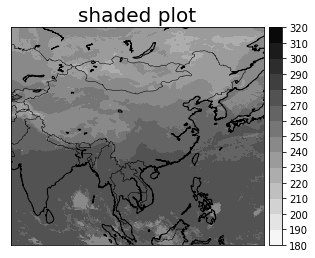

In [77]:
m=Basemap(projection='cyl',llcrnrlat=0,urcrnrlat=60,llcrnrlon=70,urcrnrlon=140,resolution='l')
#lons,lats=m.makegrid(2401,2801)#(71,41)wang
lons, lats = np.meshgrid(lon, lat)
print('lons.shape:',lons.shape)
print('lats.shape:',lats.shape)
x,y=m(lons,lats)
print('x.shape',x.shape)
print('y.shape',y.shape)
#m.drawparallels(np.arange(0.,60.,10.),labels=[1,0,0,0],fontsize=15)
#m.drawmeridians(np.arange(70.,140.,15.),labels=[0,0,0,1],fontsize=15)
m.drawcoastlines()
m.drawstates()
m.drawcountries()
m.drawlsmask()
Con=m.contourf(x.T,y.T,np.squeeze(dat[:,:,9]),np.arange(180,330,10),cmap=plt.cm.gray_r) # RdBu_r  gray_r
cbar = m.colorbar(Con,'right') #'%.1f',format = '%.1f'
cbar.set_ticks(np.arange(180,330,10))

# plt.clabel(curve,fmt='%1.0f')
plt.title('shaded plot',size=20)
plt.show()


In [32]:
y.T

masked_array(
  data=[[0.0000000e+00, 2.5000000e-02, 5.0000001e-02, ..., 5.9950001e+01,
         5.9975002e+01, 6.0000000e+01],
        [0.0000000e+00, 2.5000000e-02, 5.0000001e-02, ..., 5.9950001e+01,
         5.9975002e+01, 6.0000000e+01],
        [0.0000000e+00, 2.5000000e-02, 5.0000001e-02, ..., 5.9950001e+01,
         5.9975002e+01, 6.0000000e+01],
        ...,
        [0.0000000e+00, 2.5000000e-02, 5.0000001e-02, ..., 5.9950001e+01,
         5.9975002e+01, 6.0000000e+01],
        [0.0000000e+00, 2.5000000e-02, 5.0000001e-02, ..., 5.9950001e+01,
         5.9975002e+01, 6.0000000e+01],
        [0.0000000e+00, 2.5000000e-02, 5.0000001e-02, ..., 5.9950001e+01,
         5.9975002e+01, 6.0000000e+01]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [26]:
help(plt.savefig)

Help on function savefig in module matplotlib.pyplot:

savefig(*args, **kwargs)
    Save the current figure.
    
    Call signature::
    
      savefig(fname, dpi=None, facecolor='w', edgecolor='w',
              orientation='portrait', papertype=None, format=None,
              transparent=False, bbox_inches=None, pad_inches=0.1,
              frameon=None)
    
    The output formats available depend on the backend being used.
    
    Parameters
    ----------
    
    fname : str or file-like object
        A string containing a path to a filename, or a Python
        file-like object, or possibly some backend-dependent object
        such as :class:`~matplotlib.backends.backend_pdf.PdfPages`.
    
        If *format* is *None* and *fname* is a string, the output
        format is deduced from the extension of the filename. If
        the filename has no extension, the value of the rc parameter
        ``savefig.format`` is used.
    
        If *fname* is not a string, remember 

(2801, 2401, 10)
(2801, 2401, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


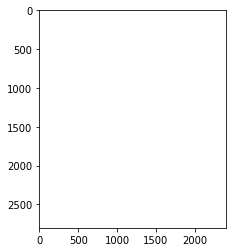

In [19]:
print(dat.shape)
bb=dat[:,:,0:3]
print(bb.shape)
plt.imshow(bb)

In [78]:
pwd

'C:\\Users\\lining\\Desktop\\myjob\\My_WRF'

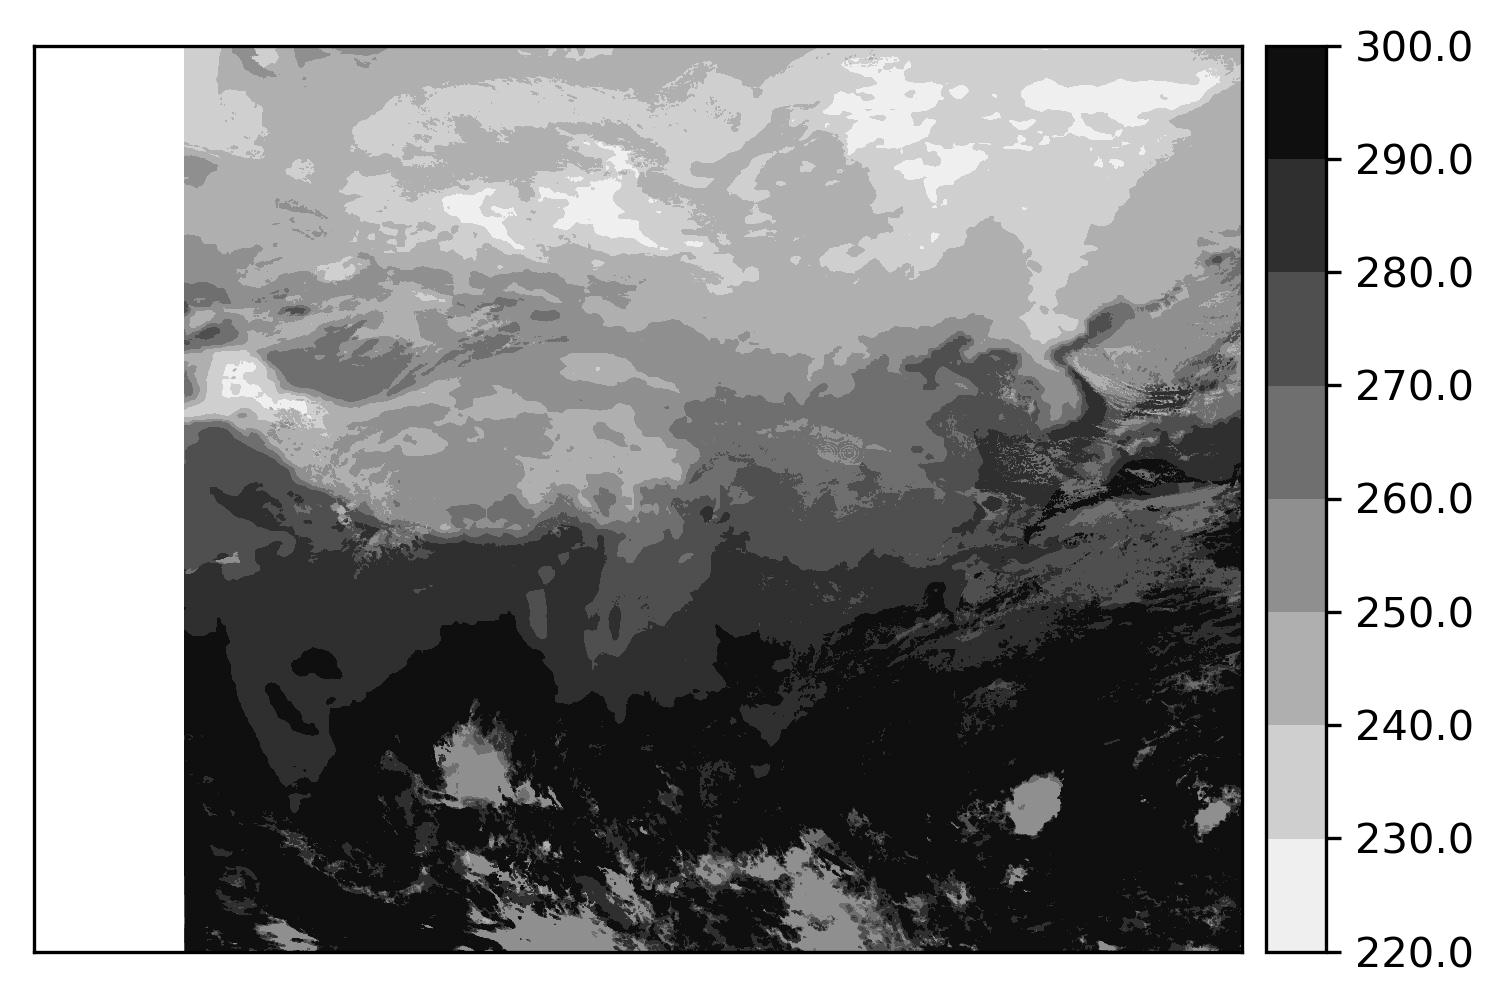

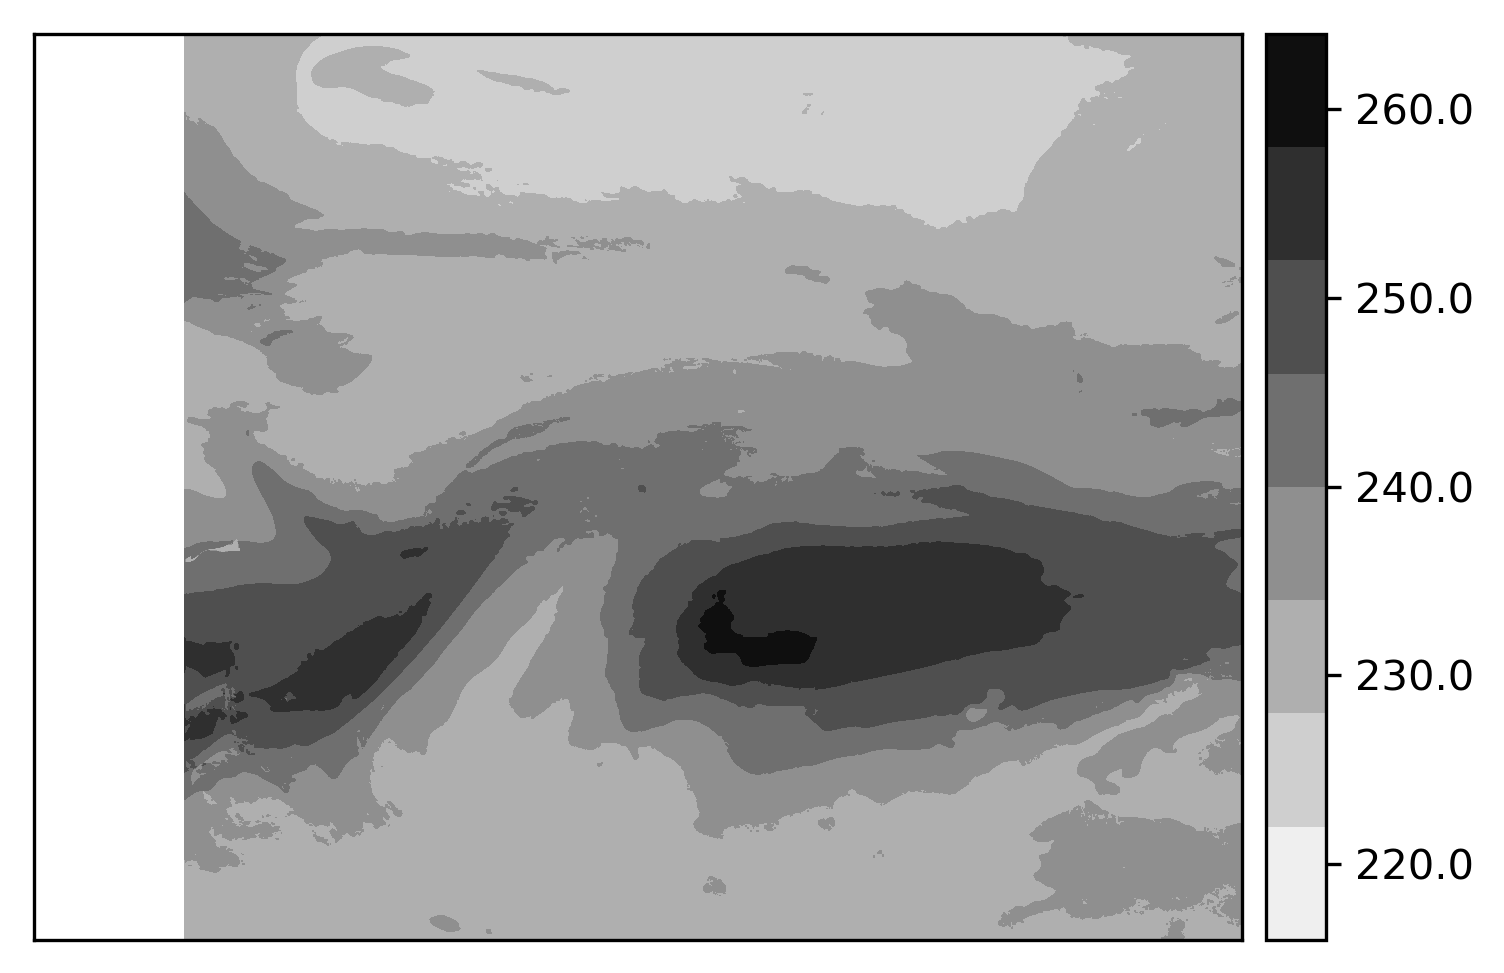

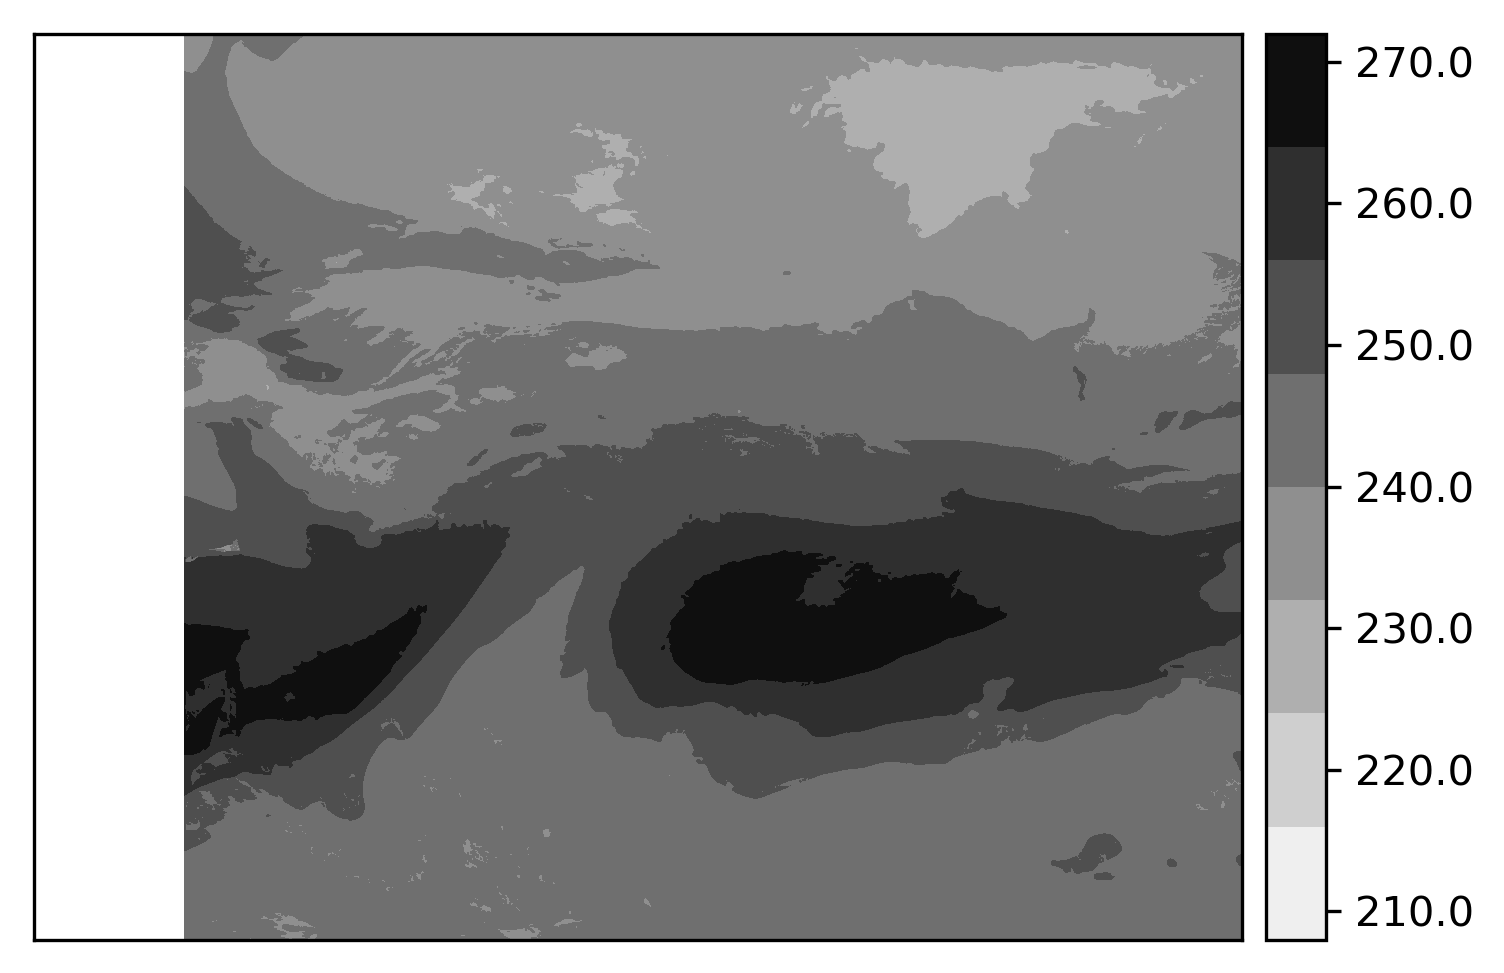

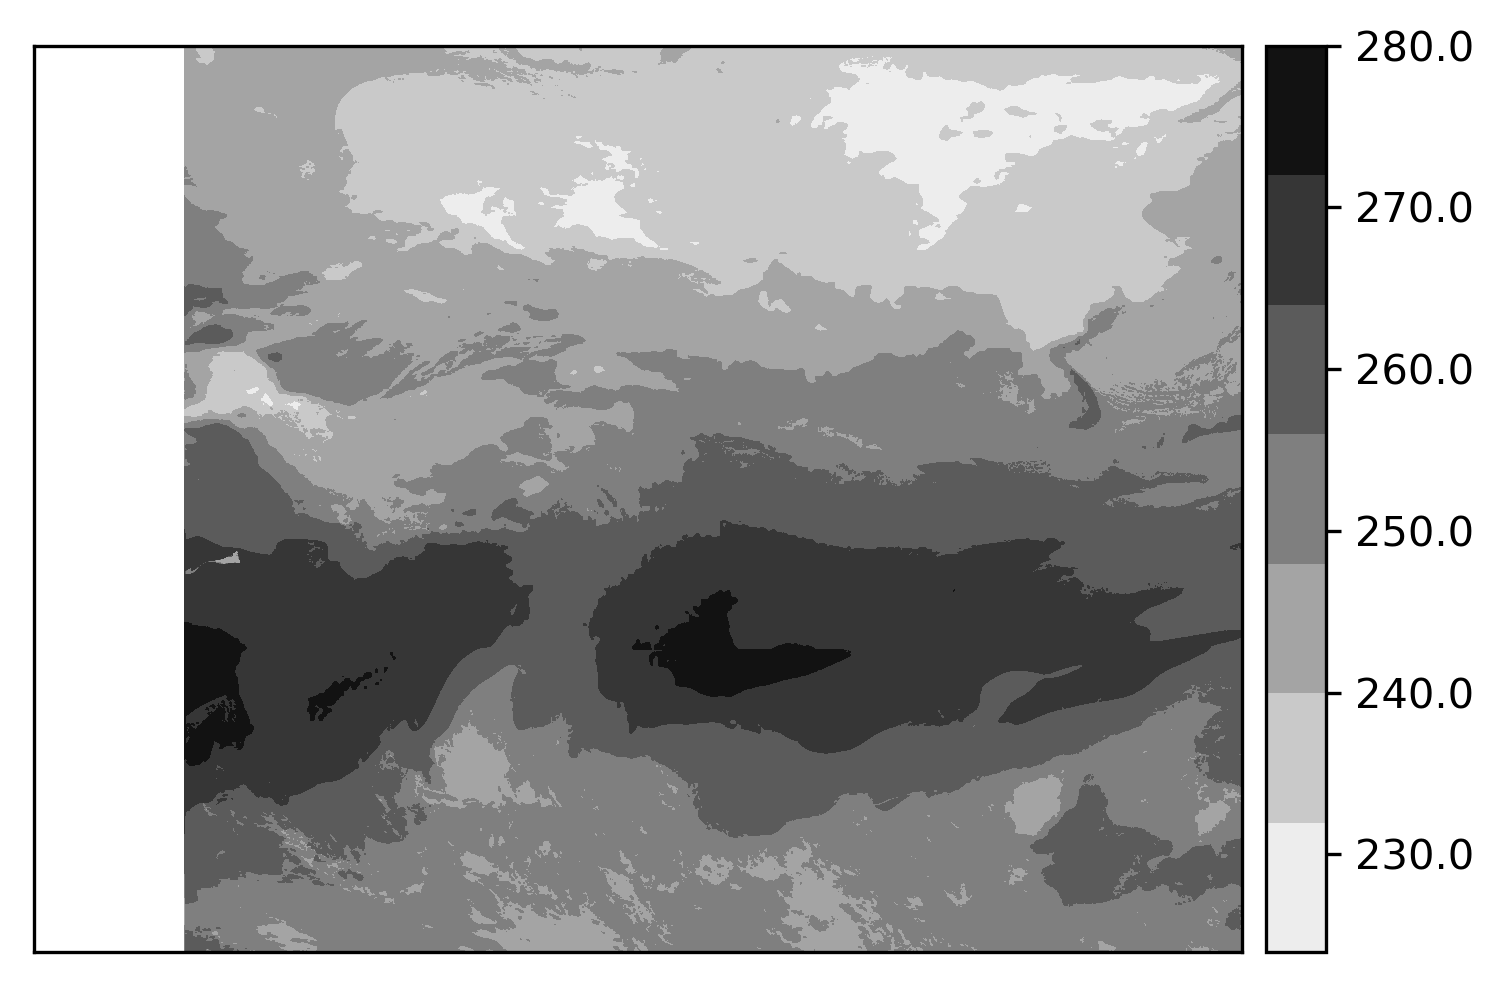

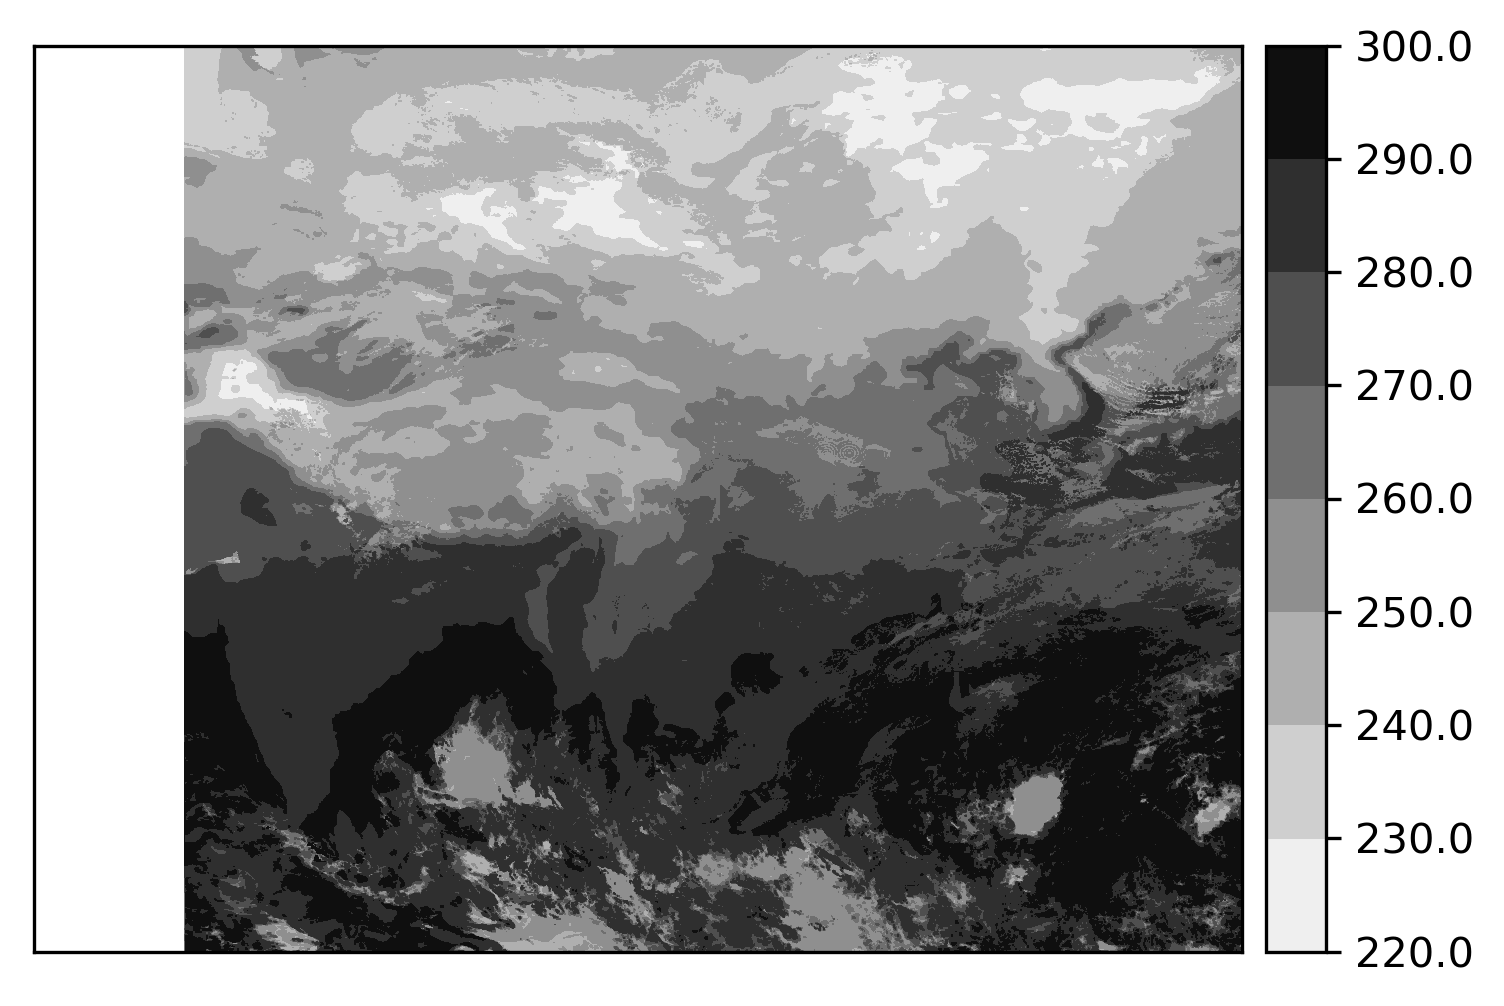

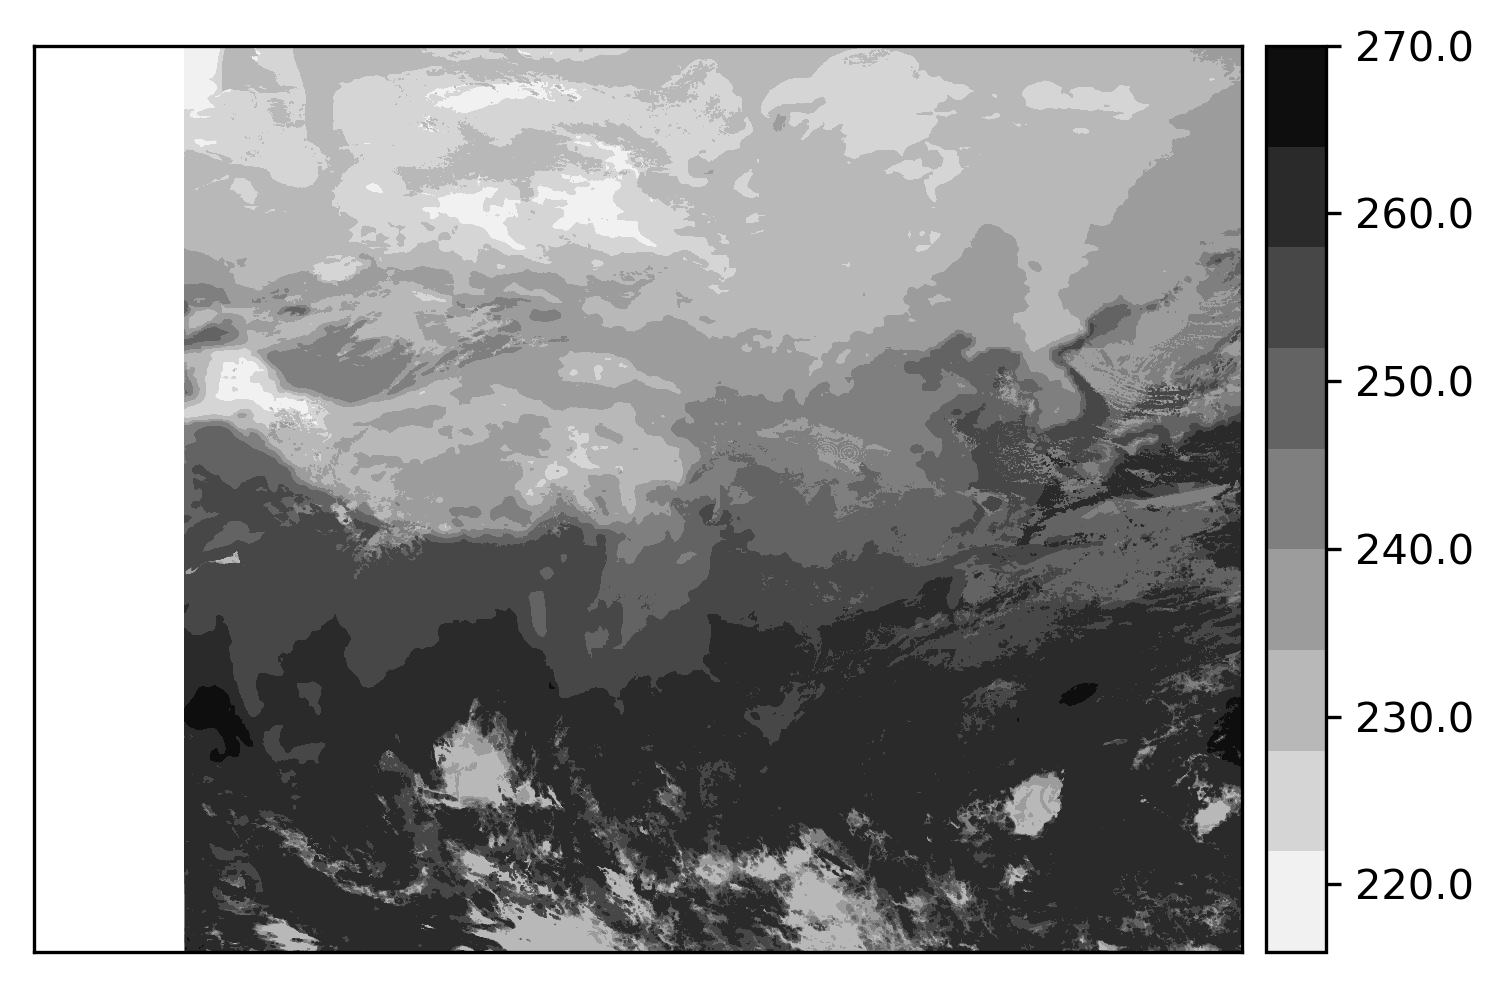

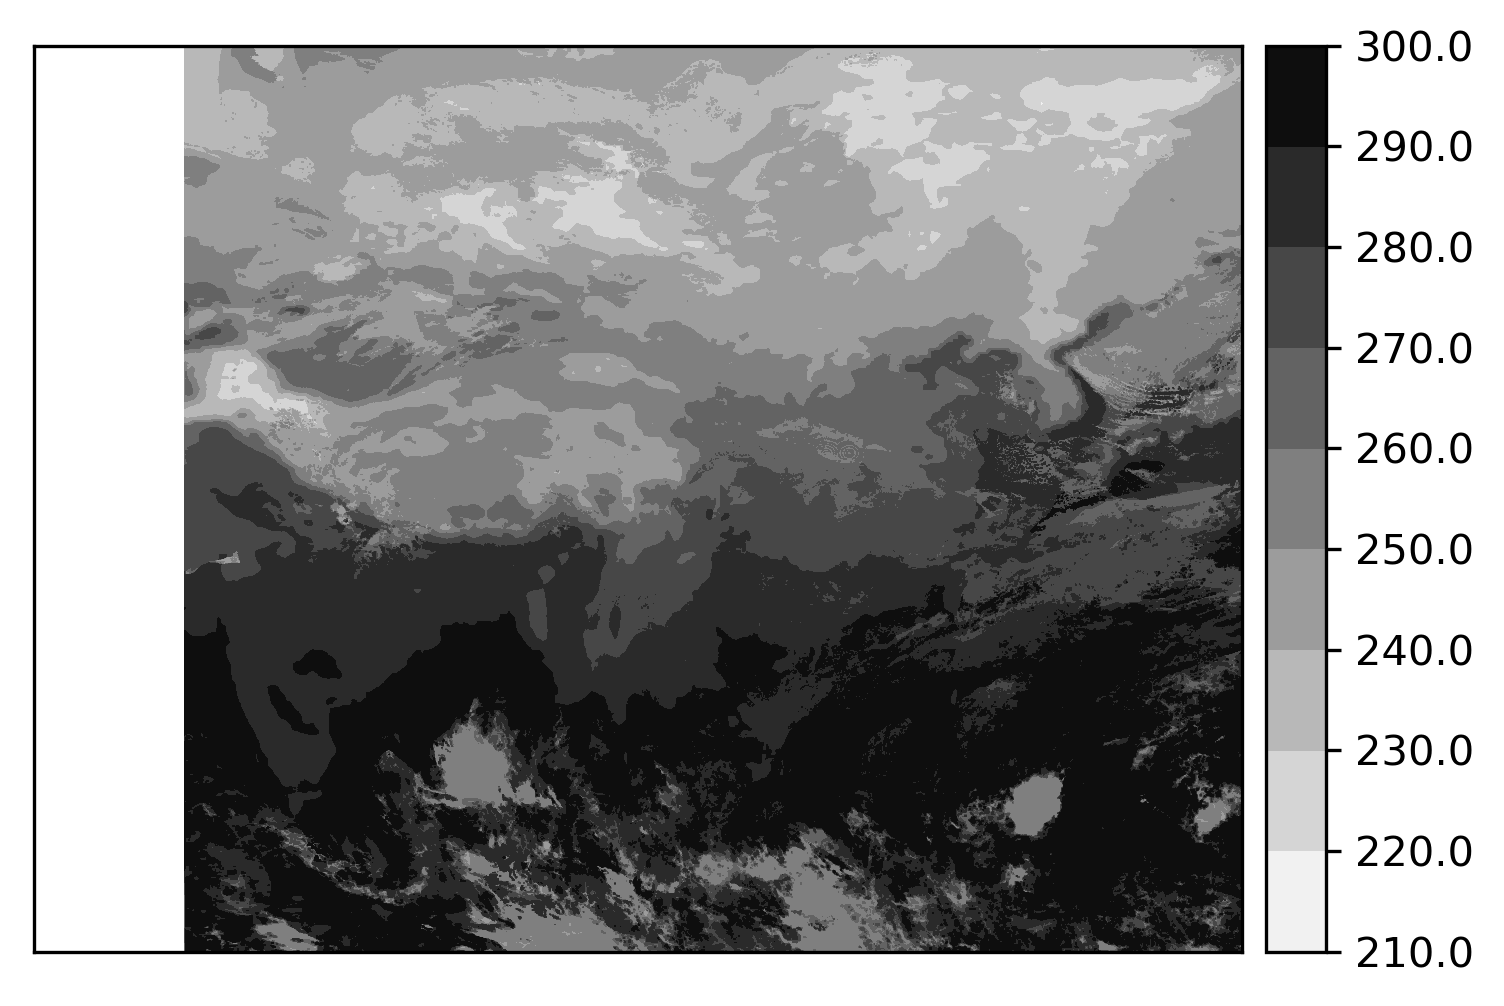

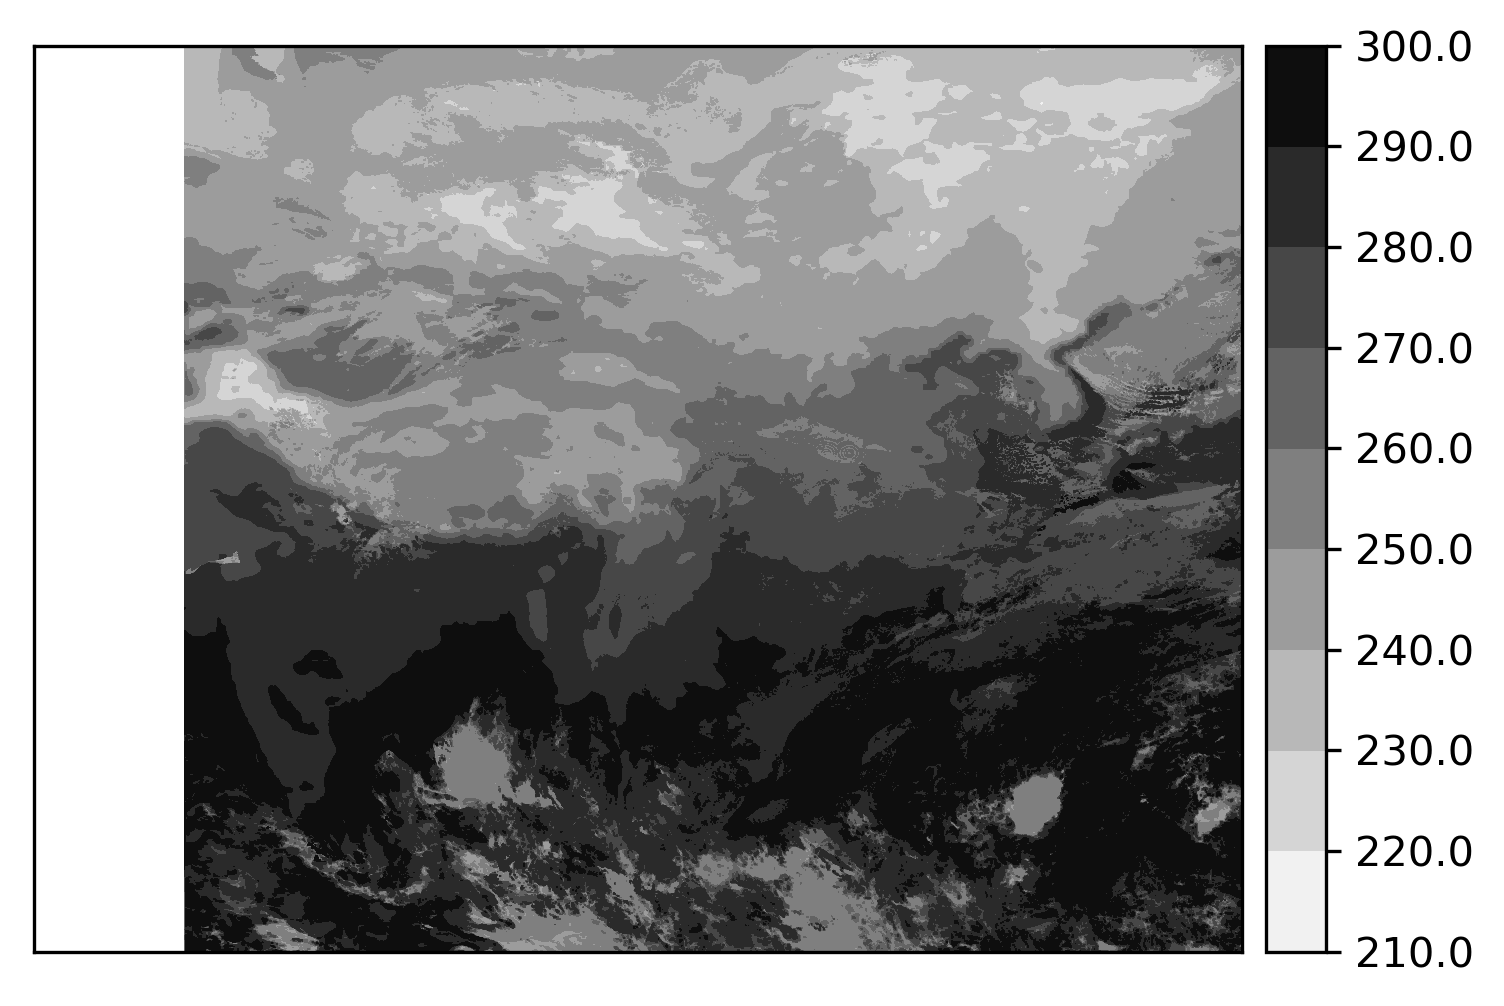

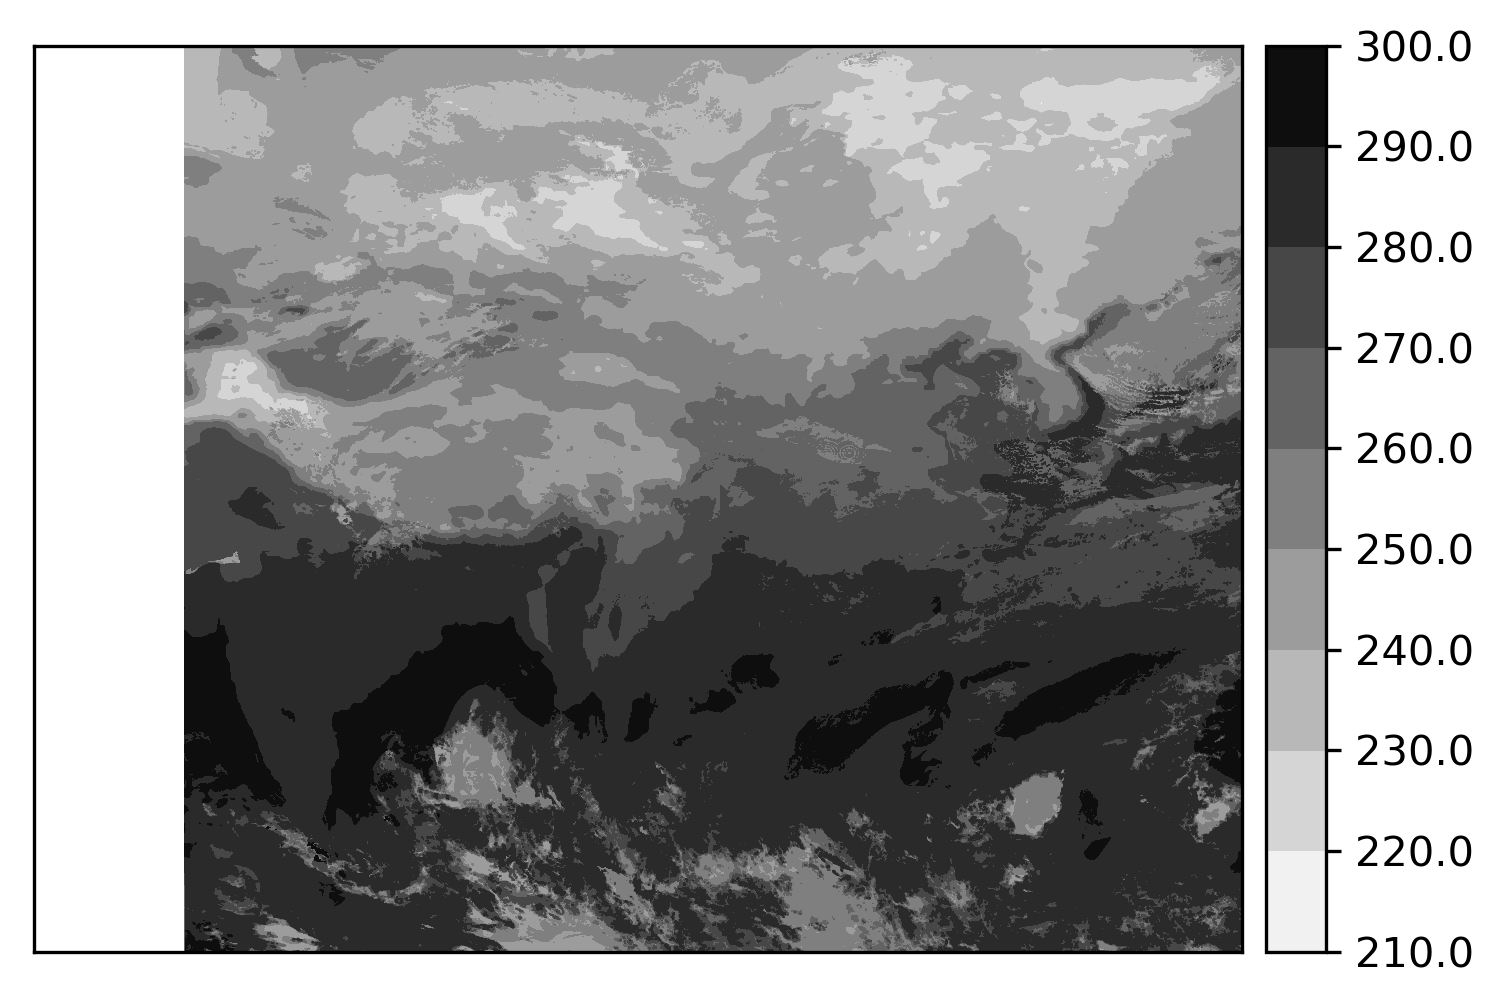

In [81]:
m=Basemap(projection='cyl',llcrnrlat=0,urcrnrlat=60,llcrnrlon=60,urcrnrlon=140,resolution='l')
%matplotlib inline
import matplotlib # 注意这个也要import一次
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize # import figsize
figsize(12, 4) # 设置 figsize
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨

for i in range(0,9):
    from matplotlib import pyplot as plt
    fig = plt.figure()
    
    Con=m.contourf(x.T,y.T,np.squeeze(dat[:,:,i]),cmap=plt.cm.gray_r)
    cbar = m.colorbar(Con,'right',ticks = np.arange(180,320,10),format = '%.1f')
    plt.savefig('cloud_fig+'+str(i+1)+'.png')
    
    

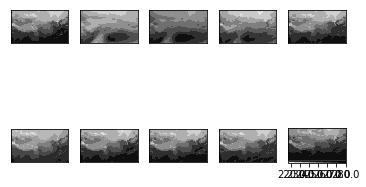

In [25]:
from matplotlib import pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(251)
Con=m.contourf(x.T,y.T,np.squeeze(dat[:,:,0]),cmap=plt.cm.gray_r)
#cbar = m.colorbar(Con,'right',ticks = np.arange(180,320,10),format = '%.1f')
# plt.clabel(curve,fmt='%1.0f')
ax2 = fig.add_subplot(252)
Con=m.contourf(x.T,y.T,np.squeeze(dat[:,:,1]),cmap=plt.cm.gray_r)
#cbar = m.colorbar(Con,'right',ticks = np.arange(180,320,10),format = '%.1f')
# plt.clabel(curve,fmt='%1.0f')
ax3 = fig.add_subplot(253)
Con=m.contourf(x.T,y.T,np.squeeze(dat[:,:,2]),cmap=plt.cm.gray_r)
#cbar = m.colorbar(Con,'right',ticks = np.arange(180,320,10),format = '%.1f')
# plt.clabel(curve,fmt='%1.0f')
ax4 = fig.add_subplot(254)
Con=m.contourf(x.T,y.T,np.squeeze(dat[:,:,3]),cmap=plt.cm.gray_r)
#cbar = m.colorbar(Con,'right',ticks = np.arange(180,320,10),format = '%.1f')
# plt.clabel(curve,fmt='%1.0f')
ax5 = fig.add_subplot(255)
Con=m.contourf(x.T,y.T,np.squeeze(dat[:,:,4]),cmap=plt.cm.gray_r)
#cbar = m.colorbar(Con,'right',ticks = np.arange(180,320,10),format = '%.1f')
# plt.clabel(curve,fmt='%1.0f')
ax6 = fig.add_subplot(256)
Con=m.contourf(x.T,y.T,np.squeeze(dat[:,:,5]),cmap=plt.cm.gray_r)
#cbar = m.colorbar(Con,'right',ticks = np.arange(180,320,10),format = '%.1f')
ax7 = fig.add_subplot(257)
Con=m.contourf(x.T,y.T,np.squeeze(dat[:,:,6]),cmap=plt.cm.gray_r)
#cbar = m.colorbar(Con,'right',ticks = np.arange(180,320,10),format = '%.1f')
ax8 = fig.add_subplot(258)
Con=m.contourf(x.T,y.T,np.squeeze(dat[:,:,7]),cmap=plt.cm.gray_r)
#cbar = m.colorbar(Con,'right',ticks = np.arange(180,320,10),format = '%.1f')
ax9 = fig.add_subplot(259)
Con=m.contourf(x.T,y.T,np.squeeze(dat[:,:,8]),cmap=plt.cm.gray_r)

ax10 = fig.add_subplot(2,5,10)
Con=m.contourf(x.T,y.T,np.squeeze(dat[:,:,9]),cmap=plt.cm.gray_r)
cbar = m.colorbar(Con,'bottom',ticks = np.arange(180,320,10),format = '%.1f')
# plt.clabel(curve,fmt='%1.0f')
plt.grid(True)
plt.show()

In [24]:
help(m.colorbar)

Help on method colorbar in module mpl_toolkits.basemap:

colorbar(mappable=None, location='right', size='5%', pad='2%', fig=None, ax=None, **kwargs) method of mpl_toolkits.basemap.Basemap instance
    Add colorbar to axes associated with a map.
    The colorbar axes instance is created using the axes_grid toolkit.
    
    .. tabularcolumns:: |l|L|
    
    ==============   ====================================================
    Keywords         Description
    ==============   ====================================================
    mappable         the Image, ContourSet, etc. to which the colorbar
                     applies.  Default None, matplotlib.pyplot.gci() is
                     used to retrieve the current image mappable.
    location         where to put colorbar ('top','bottom','left','right')
                     Default 'right'.
    size             width of colorbar axes (string 'N%', where N is
                     an integer describing the fractional width of the p